# Collaboration and Competition

---

## Start the Environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import matplotlib.pyplot as plt
from train import do_episode

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis/Tennis.x86_64", no_graphics=False)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])
print(f'State shape: {states.shape}')

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]
State shape: (2, 24)


## Run experiment with agent

Agent loaded


/home/jorge/miniconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Average score: 0.2850 over 5 episodes.


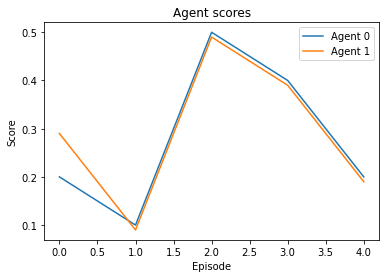

[[0.2        0.29      ]
 [0.1        0.09      ]
 [0.50000001 0.49000001]
 [0.40000001 0.39000001]
 [0.2        0.19      ]]


In [4]:
agent = torch.load('agents/DobleUber-21pdakpo.pt')
print('Agent loaded')

episodes = 5
scores = np.zeros((episodes, 2)) 

for i in range(episodes):
    episode_score = np.zeros((2,))
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations
    next_action = agent.start(state)

    while not np.any(env_info.local_done):
        # Take a step from the agent
        reward = env_info.rewards
        episode_score += reward
        state = env_info.vector_observations

        next_action = agent.step(state, reward, learn=False)

        # Perform action
        env_info = env.step(next_action)[brain_name]

    # Last reward
    episode_score += env_info.rewards
    agent.end(env_info.rewards)

    scores[i] = episode_score
    
print(f'Average score: {np.mean(scores):.4f} over {episodes} episodes.')

if episodes > 1:
    plt.plot(scores[:,0], label='Agent 0')
    plt.plot(scores[:,1], label='Agent 1')
    plt.title('Agent scores')
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.legend()
    plt.show()

print(scores)

When finished, you can close the environment.

In [5]:
env.close()